In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_10w_14d_8r_3s_10c_synt.json
1.	dc_12w_12c_13d_4s_4r_tiles_rr.json
2.	dc_5d_4c_4s_4r_12w.json
3.	dc_AEC_1d_2c_1s_4r_4w.json
4.	dc_EEG_18d_12c_6s_10r_12w_RR.json
5.	dc_EEG_18d_9c_3s_5r_9w_RR.json
6.	dc_EEG_1d_1c_3s_2r_3w_RR.json
7.	dc_EEG_1d_2c_1s_4r_4w.json
8.	dc_EEG_3d_1c_1s_1r_1w.json
9.	dc_EEG_4d_3c_3s_2r_3w.json
10.	dc_EEG_8d_1c_3s_2r_3w_RR.json
11.	dc_EEG_8d_3c_3s_2r_3w.json
12.	dc_EEG_8d_3c_3s_2r_3w_RR.json
13.	dc_EEG_8d_3c_3s_2r_3w_demo_RR.json
14.	dc_EEG_8d_3c_3s_5r_3w_RR.json
15.	dc_EEG_8d_8c_3s_5r_8w_RR.json
16.	dc_FedTorchTest_5d_2s_2r_4c_4w.json
17.	dc_dist_14d.json
18.	dc_dist_2d_3c_2s_3r_6w.json
19.	dc_fed_dist_14d.json
20.	dc_fed_dist_2d_3c_2s_3r_6w.json
21.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
22.	dc_mnist_13d_12w_4r_3s_3tokens.json
23.	dc_mnist_4w_5d_4r_4s_rr.json
24.	dc_synt_8d_8w_2c_4s_4r.json
25.	dc_synt_8d_8w_4c_6r_4s.json
26.	dc_synt_distributed_w5_c3_6r_3s_3d.json
27.	dc_test_synt_1d_2c_1s_4r_4w.json
28.	

In [4]:
dc = 8
conn = 24
exp = 2
API.setJsons(dc , conn , exp)

In [5]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [6]:
exp_name = "EEG_Emotion_confusion_Matrix_test"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-08-11 15:01:56,123] 
Network components:
                 Receiver's Address: http://10.0.0.11:9000
                 Frequency: 2 [batches/sec]
                 Batchsize: 10 [samples]
                 devicesIp: ['10.0.0.11', '10.0.0.8', '10.0.0.12']
                 mainServerIp: 10.0.0.11
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.11
                 apiServerPort: 9000
                 Clients: ['c1']
                 Workers: ['w1']
                 Sources: ['s1']
                 Routers: ['r1']
[INFO][2024-08-11 15:01:56,124] Connections:
[INFO][2024-08-11 15:01:56,124] 		 r1 : ['mainServer', 'c1', 's1']
[INFO][2024-08-11 15:01:56,126] Experiment name: EEG_Valence_Recognition_DEAP
[INFO][2024-08-11 15:01:56,129] Batch size: 10
[INFO][2024-08-11 15:01:56,130] Number of features: 70
[INFO][2024-08-11 15:01:56,131] Number of labels: 9
[INFO][2024-08-11 15:01:56,132] 
[INFO][2024-08-11 15:01:56,134] Phases:
[INFO][2024-08-11 15:01:56,135]

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-08-11 15:01:58,166] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Connections:  [('r1', ['mainServer', 'c1', 's1'])]
Routers:  ['r1']
Workers:  ['w1']
Adding edge (r1 , mainServer) to graph
Adding edge (r1 , c1) to graph
Adding edge (r1 , s1) to graph


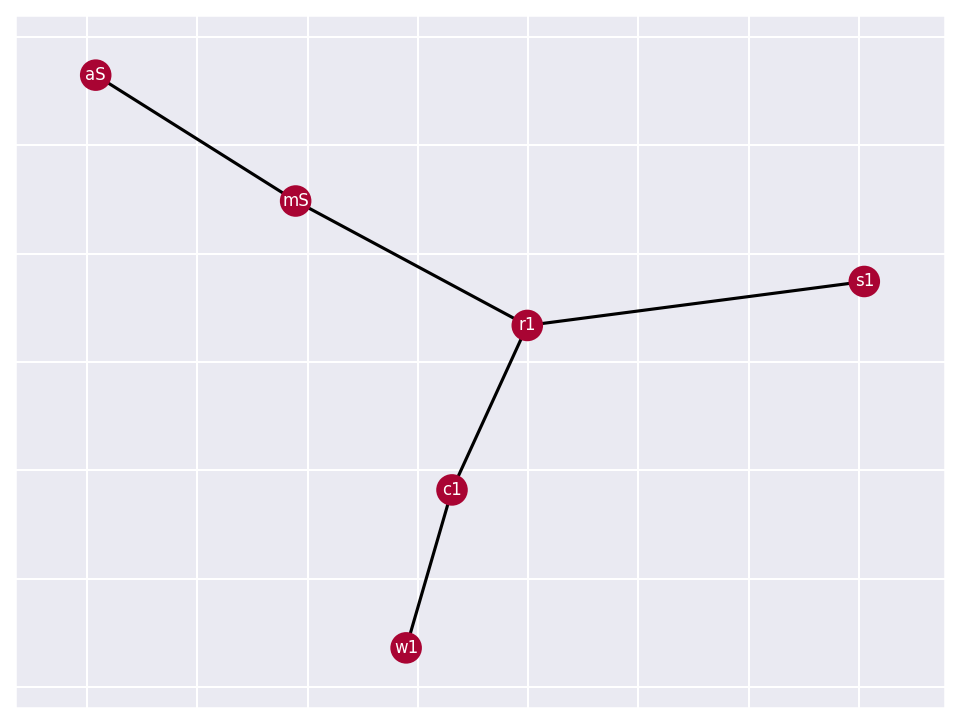

In [7]:
%pip install networkx pygraphviz
import networkx as nx
def visualize_nerlnet_graph(api_server_inst,  connections : dict , components): # connections is a dictionary with keys as routers and values as lists of their neighbors
    print("Connections: " , list(connections.items()))
    routers = list(connections.keys())
    print("Routers: " , routers)
    workers = list(components.map_worker_to_client.keys())
    print("Workers: " , workers)
    graph = nx.Graph()
    nodes = routers + components.sources + components.clients + workers + [API_SERVER_STR , MAIN_SERVER_STR]
    edges = [] # list of tuples
    for router , neighbors in list(connections.items()):
        for neighbor in neighbors:
            if (router,neighbor) not in edges:
                print(f"Adding edge ({router} , {neighbor}) to graph")
                edges.append((router , neighbor))
    edges.append((API_SERVER_STR , MAIN_SERVER_STR)) # Always connected
    for worker in workers:
        edges.append((worker , components.map_worker_to_client[worker]))
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    
    my_labels = {'mainServer': 'mS' , 'apiServer': 'aS'}
    nx.relabel_nodes(graph, my_labels , copy=False)
    
    default_colors = {node:'#A90433' for node in graph.nodes()}
    node_colors = {node:default_colors[node] for node in graph.nodes()}
    nx.set_node_attributes(graph, node_colors, 'color')
    colors = nx.get_node_attributes(graph, 'color').values()

    pos = nx.nx_agraph.graphviz_layout(graph)
    angle = 100
    
    plt.figure(figsize=(8,6),dpi=150)
    nx.draw_networkx(graph, pos, with_labels=True, node_color=colors , node_size=200, font_size=8, font_color='white' , edge_color='black' , width=1.5)
    plt.show()
visualize_nerlnet_graph(API , API.json_dir_parser.json_from_path(conn_path)['connectionsMap'] , globe.components)

In [8]:
API.send_jsons_to_devices()

[INFO][2024-08-11 15:02:00,881] Sending distributed configurations to devices is completed


In [9]:
API.run_current_experiment_phase()

[INFO][2024-08-11 15:02:00,888] Experiment phase: training_phase of type training starts running...
[INFO][2024-08-11 15:02:00,889] Sending data to sources
[INFO][2024-08-11 15:02:01,699] Data is ready in sources
[INFO][2024-08-11 15:02:01,700] Phase training requested from Main Server
[INFO][2024-08-11 15:08:22,941] Processing experiment phase data
[INFO][2024-08-11 15:08:22,953] Processing experiment phase data completed
[INFO][2024-08-11 15:08:22,954] Start generating communication statistics for training_phase of type training
[INFO][2024-08-11 15:08:22,955] Statistics requested from Main Server
[INFO][2024-08-11 15:08:23,360] Statistics received from Main Server
[INFO][2024-08-11 15:08:23,361] Phase of training_phase training completed


In [10]:
stats_train1 = API.get_experiment_flow(exp_name).generate_stats()

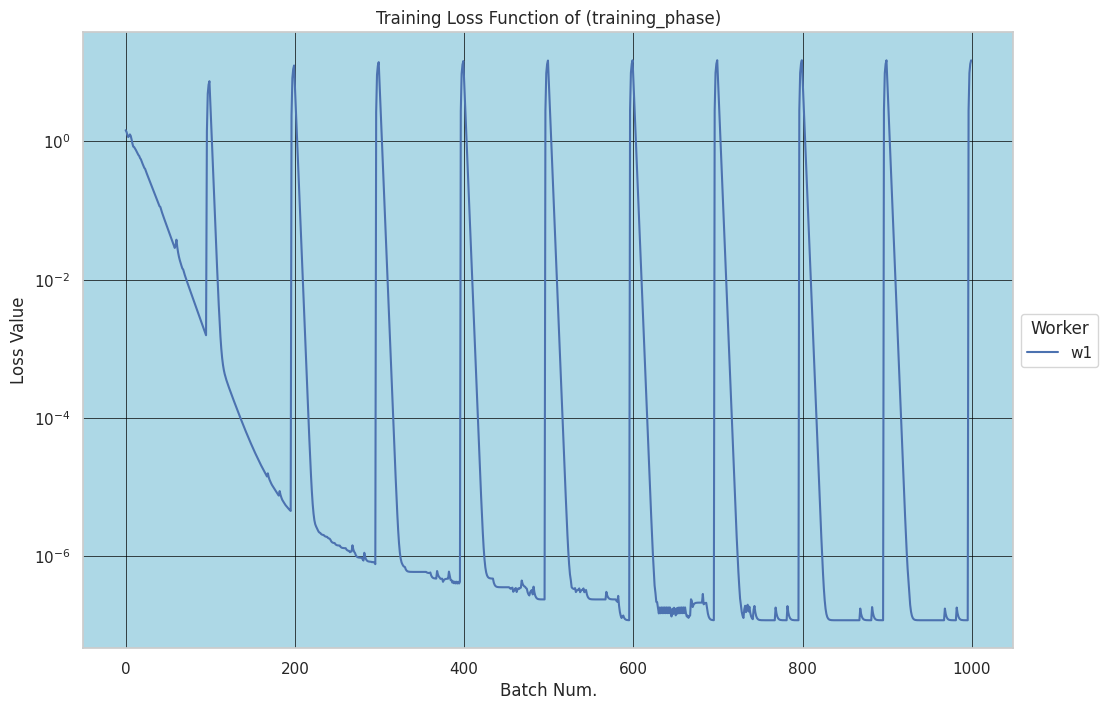

In [11]:
loss_ts = stats_train1.get_loss_ts(plot=True, smoothing = True, log_plot = True)

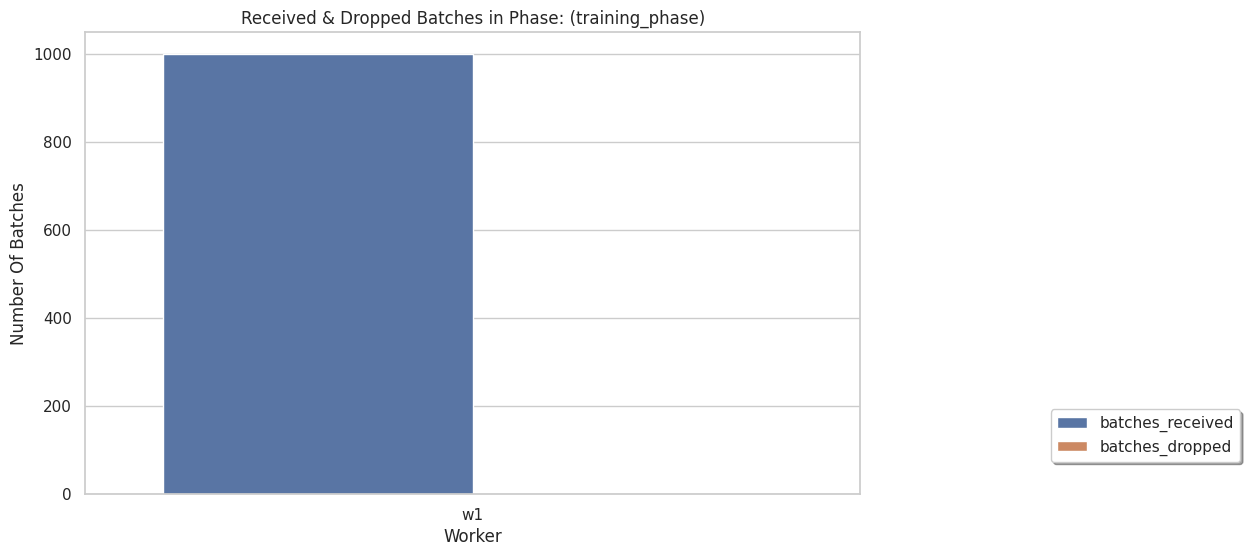

In [12]:
stats_train1.plot_batches_status(plot=True)

In [13]:
missed_dict = stats_train1.get_missed_batches()
print(missed_dict)

{}


In [14]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-11 15:08:24,120] Experiment phase: prediction_phase1 of type prediction starts running...
[INFO][2024-08-11 15:08:24,121] Sending data to sources
[INFO][2024-08-11 15:08:24,319] Data is ready in sources
[INFO][2024-08-11 15:08:24,320] Phase prediction requested from Main Server
[INFO][2024-08-11 15:08:29,141] Processing experiment phase data
[INFO][2024-08-11 15:08:29,143] Processing experiment phase data completed
[INFO][2024-08-11 15:08:29,143] Start generating communication statistics for prediction_phase1 of type prediction
[INFO][2024-08-11 15:08:29,144] Statistics requested from Main Server
[INFO][2024-08-11 15:08:29,549] Statistics received from Main Server
[INFO][2024-08-11 15:08:29,551] Phase of prediction_phase1 prediction completed


In [15]:
stats_pred = API.get_experiment_flow(exp_name).generate_stats()

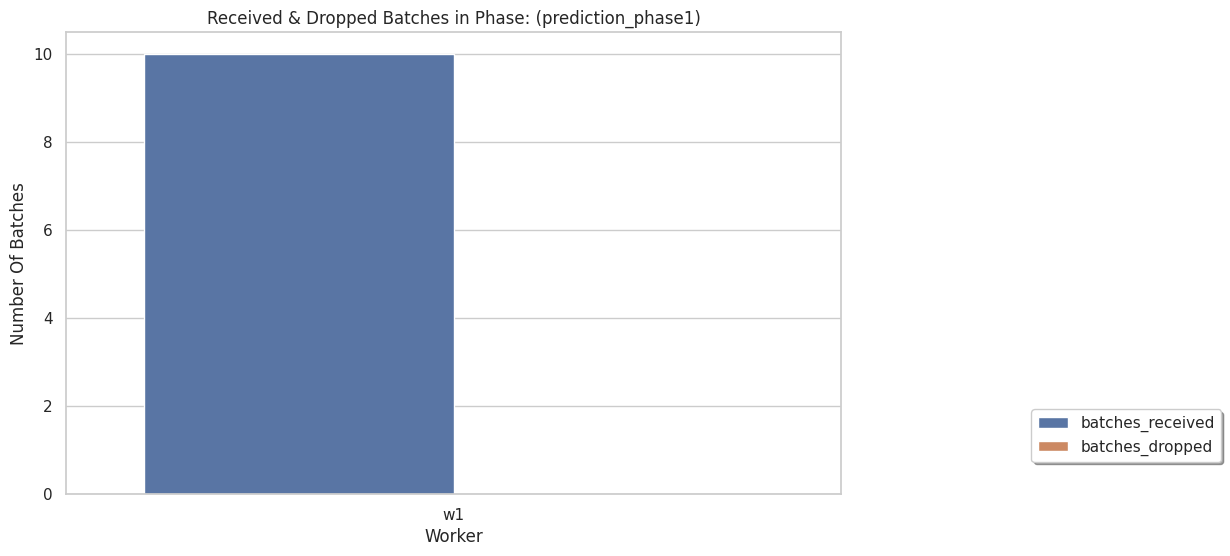

In [16]:
stats_pred.plot_batches_status(plot=True)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

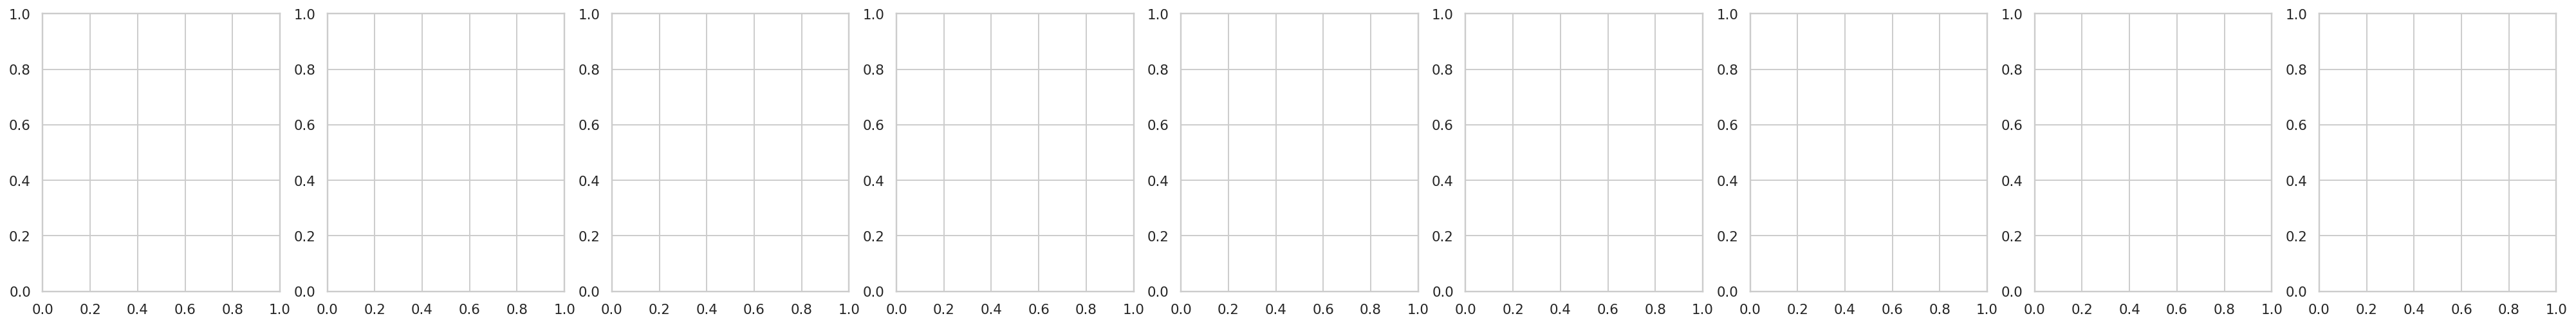

In [17]:
_ , conf_mats_workers = stats_pred.get_confusion_matrices(plot = True)